- This notebook computes the correlation between MERFISH and stereo-seq on shared genes.

In [1]:
import anndata
import seaborn
import numpy as np
import pandas as pd
import scanpy as sc

### MERFISH vs Stereo-seq correlation  of gene expression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scanpy as sc
sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi = 180, dpi_save = 300, frameon = False, figsize = (4,4), fontsize=8,facecolor = 'white')

- Load-in the MERFISH and stereo-seq data 

In [ ]:
%%time
chip5_MERFISH = sc.read_h5ad(r'./../../processed_data/scdata_MERFISH_BG_annotated.h5ad')
chip5_Stereoseq_filtered = sc.read_h5ad(r'./../../processed_data/chip5_filtered_annotated.h5ad')

# the raw count 
chip5_Stereoseq_raw = sc.read_h5ad(r'./../../HumanBG_stereo_seq_data/chip5_Y00550_N4P6/SAW/Y00550N4P6/outs/feature_expression/Y00550N4P6.adjusted.cellbin_QC_flaged_05172025.h5ad')


CPU times: user 1min 27s, sys: 16 s, total: 1min 43s
Wall time: 1min 44s


In [13]:
# common gene 
common_gene = list(set(chip5_MERFISH.var_names).intersection(chip5_Stereoseq_raw.var['Gene'].values))

In [14]:
chip5_MERFISH.X = chip5_MERFISH.obsm['X_raw'].copy()
MERFISH_xmean  = chip5_MERFISH[:,common_gene].X.mean(axis = 0)


In [15]:
from tqdm import tqdm 
stereseq_xmean = []
for gn in tqdm(common_gene, desc = 'average of stereo-seq data'):
    keep = np.isin(chip5_Stereoseq_raw.var['Gene'].values,[gn])
    tempx = chip5_Stereoseq_raw[:,keep].X.toarray().sum()/len(chip5_Stereoseq_raw)
    stereseq_xmean += [tempx]
stereseq_xmean = np.hstack(stereseq_xmean)

average of stereo-seq data: 100%|██████████| 672/672 [01:34<00:00,  7.13it/s]


In [16]:
stereseq_xmean.shape

(672,)

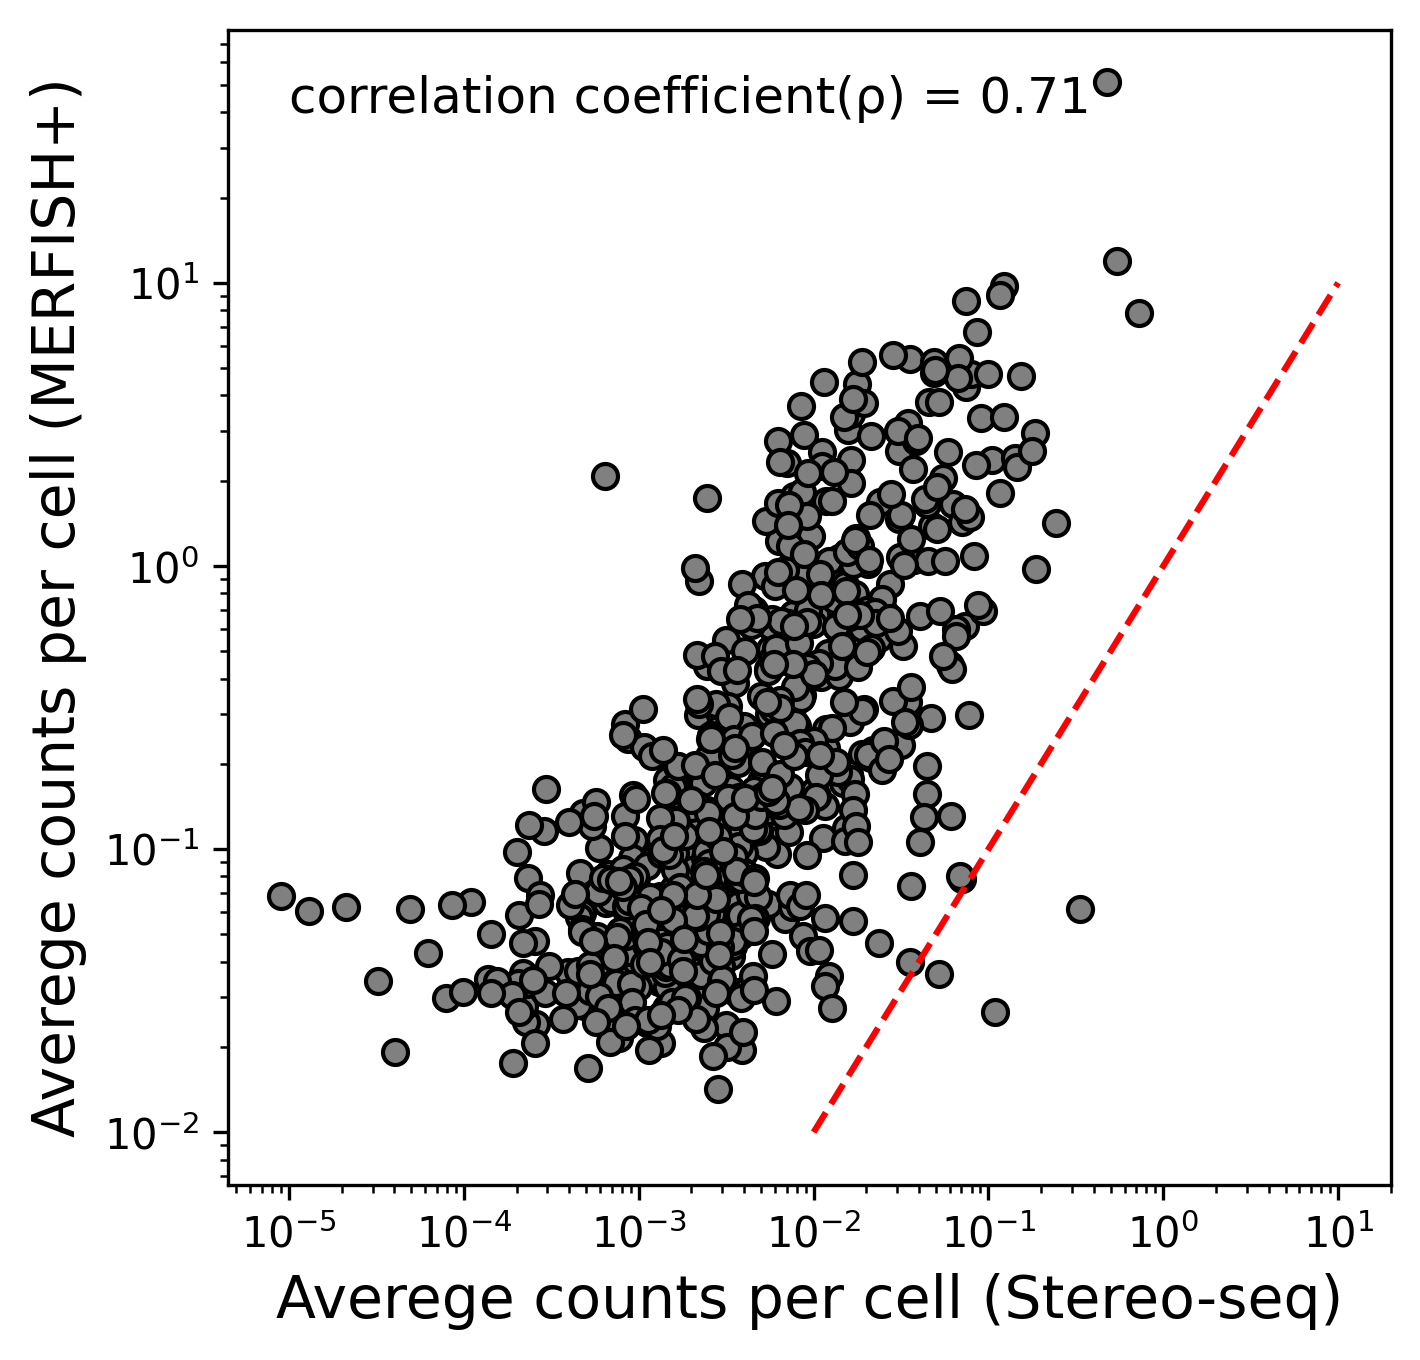

In [17]:
r = np.corrcoef(np.log(MERFISH_xmean),np.log(stereseq_xmean))[0,1]
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=300)
ax.loglog(stereseq_xmean,MERFISH_xmean,'o',color='gray',mec='k')

ax.text(1e-5,40,'correlation coefficient(ρ) = '+str(np.round(r,2)), c = 'k', fontsize = 12)
ax.grid(False)
ax.set_xlabel('Averege counts per cell (Stereo-seq)', c = 'k', fontsize = 14)
ax.set_ylabel('Averege counts per cell (MERFISH+)', c = 'k', fontsize = 14)

ax.loglog([1e-2,1e1],[1e-2,1e1],'--',color='red')

plt.savefig(r'./figures/Figure1/supplemental/Stereseq_MERFISH_correlation.png', bbox_inches = 'tight')
plt.savefig(r'./figures/Figure1/supplemental/Stereseq_MERFISH_correlation.tif', bbox_inches = 'tight')
plt.savefig(r'./figures/Figure1/supplemental/Stereseq_MERFISH_correlation.eps', bbox_inches = 'tight')
plt.show()